In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

sns.set(style="white") 
sns.set(style="whitegrid", color_codes=True)

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
# importing dataset
df = pd.read_csv('DS3_C6_S2_Classification_BankChurn_Data_Project.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# finding out the no of columns and rows 
df.shape

(10000, 13)

In [4]:
# description of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
# checking null values, if any
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

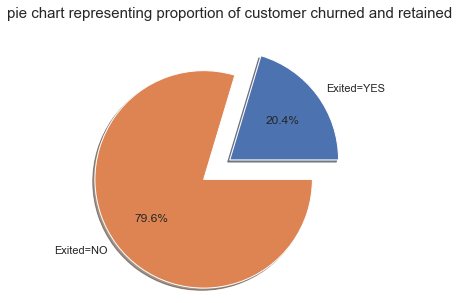

In [6]:
labels = 'Exited=YES', 'Exited=NO'
sizes = [df.Exited[df['Exited'] == 1].count(), df.Exited[df['Exited'] == 0].count()]
explode = (0, 0.3)
fig1, ax1 = plt.subplots(figsize = (10, 5))
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%', shadow = True)
plt.title("pie chart representing proportion of customer churned and retained", size = 15);

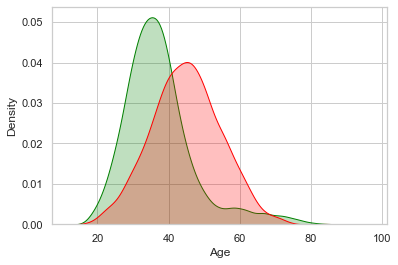

In [7]:
# plot for age to exited
sns.kdeplot(df[df['Exited'] == 0]['Age'], shade = True, color = 'green');
sns.kdeplot(df[df['Exited'] == 1]['Age'], shade = True, color = 'red');

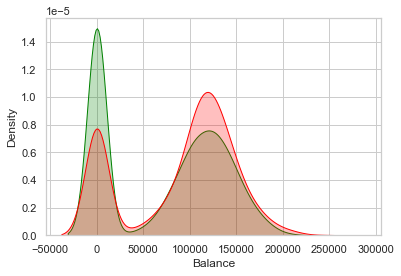

In [8]:
# plot for balance to exited
sns.kdeplot(df[df['Exited'] == 0]['Balance'], shade = True, color = 'green');
sns.kdeplot(df[df['Exited'] == 1]['Balance'], shade = True, color = 'red');

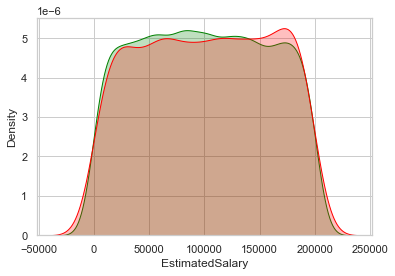

In [9]:
# plot for estimated salary and exited
sns.kdeplot(df[df['Exited'] == 0]['EstimatedSalary'], shade = True, color = 'green');
sns.kdeplot(df[df['Exited'] == 1]['EstimatedSalary'], shade = True, color = 'red');

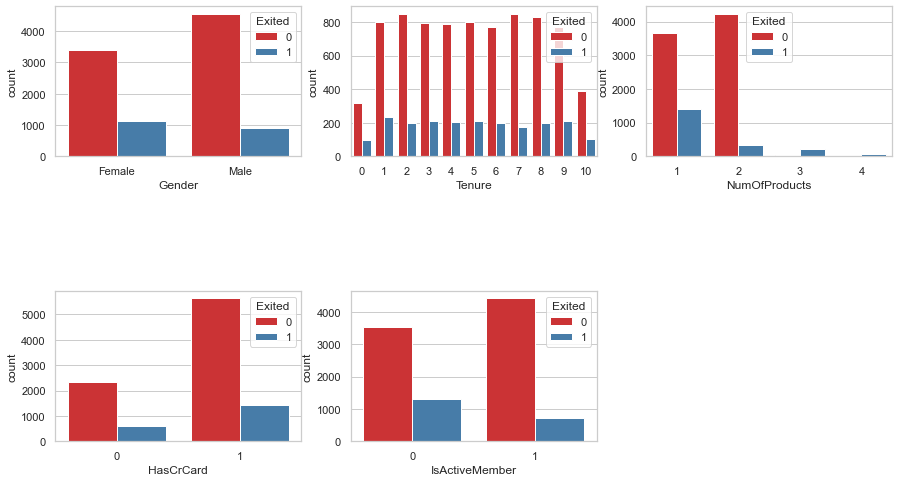

In [10]:
# plot to understand distribution of churn in different attributes
z = ['Gender',
    'Tenure',
    'NumOfProducts',
    'HasCrCard',
    'IsActiveMember']

enumerate(z)

list_z = list(enumerate(z))

plt.figure(figsize = (15, 8))

for i in list_z:
    plt.subplot(2, 3, i[0]+1)
    plt.subplots_adjust(hspace=0.9)
    sns.countplot(x = i[1], hue = 'Exited', palette="Set1", data = df)
    plt.xticks(rotation = 0)

In [11]:
# droping columns which seems not to directly effect the prediction
df_a = df.drop(['CustomerId', 'Geography', 'Gender', 'Surname', 'CreditScore', 'EstimatedSalary'], axis = 1)
df_a.shape

(10000, 7)

<AxesSubplot:>

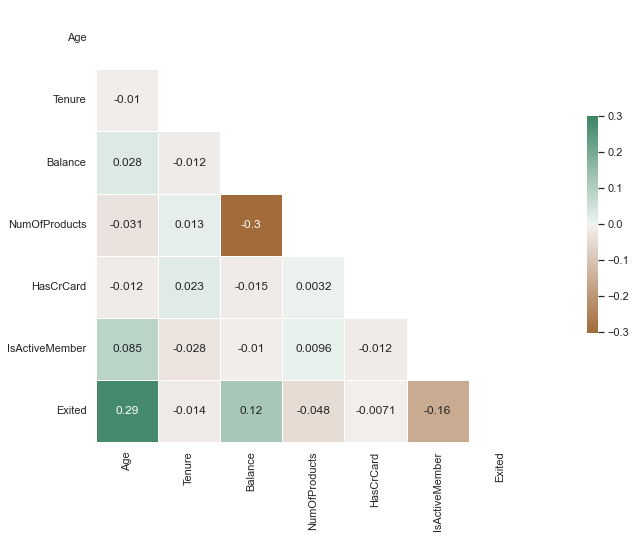

In [12]:
corr = df_a.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(400, 150, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [13]:
df_scale = df_a

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

scale_columns = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
df_scale[scale_columns] = minmax.fit_transform(df_a[scale_columns])
df_scale.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0.324324,0.2,0.000000,0.000000,1.0,1.0,1.0
1,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.0
2,0.324324,0.8,0.636357,0.666667,1.0,0.0,1.0
3,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.0
4,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.0


In [14]:
# extracting features and variables
X = df_scale.drop(columns = 'Exited', axis = 1)
y = df.Exited

# Train-Test Separation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 30)

### LOGISTIC REGRESSION

In [15]:
from sklearn.linear_model import LogisticRegression

# creating a logistic regression classifier
logreg = LogisticRegression()

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
logreg.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred = logreg.predict(X_test)

# accuracy calculation
print('ACCURACY OF LOGISTIC REGRESSION MODEL:', round(logreg.score(X_test, y_test), 2))

ACCURACY OF LOGISTIC REGRESSION MODEL: 0.8


### RANDOM FOREST CLASSIFIER

In [16]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
rf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
rf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = rf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics
 
# using metrics module for accuracy calculation
print("ACCURACY OF RANDOM FOREST CLASSIFIER MODEL: ", round(metrics.accuracy_score(y_test, y_pred), 2))

ACCURACY OF RANDOM FOREST CLASSIFIER MODEL:  0.83


### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# creating an user defined function to create a slider for k-values, to find the best accuracy
def knn(k):
    data = df_scale
    
    # the data
    X = df_scale.drop(columns = 'Exited', axis =1)
    y = df.Exited

    # learning the classifier
    kn = neighbors.KNeighborsClassifier(k)
    kn.fit(X, y)
    print("ACCURACY OF THE MODEL:", round(kn.score(X_test, y_test), 2))

from ipywidgets import interactive
from sklearn import neighbors
k_value = interactive(knn, k=(2, 20, 2))

k_value

interactive(children=(IntSlider(value=10, description='k', max=20, min=2, step=2), Output()), _dom_classes=('w…

#### highest accuracy is when value of k is 2.

In [18]:
# reperforming the knn algorithm with required value of k
kn = neighbors.KNeighborsClassifier(2)
kn.fit(X, y)
print("ACCURACY OF KNN MODEL:", round(kn.score(X_test, y_test), 2))

ACCURACY OF KNN MODEL: 0.89


### DECISION TREE CLASSIFIER

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# creating a decision tree classifier
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
dtc = tree.DecisionTreeClassifier().fit(X_train, y_train)
#print(clf.score(X_test, y_test))

In [20]:
# setting hyperparameters
grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}
dtc = tree.DecisionTreeClassifier()

from sklearn.model_selection import GridSearchCV
dtc_cv = GridSearchCV(dtc, grid, cv = 6)
dtc_cv.fit(X_train, y_train)

print("tuned hpyerparameters (best parameters): ", dtc_cv.best_params_)

tuned hpyerparameters (best parameters):  {'criterion': 'entropy', 'max_depth': 6}


In [21]:
# applying tuned hyperparameters and fitting train data set
dtc = tree.DecisionTreeClassifier(criterion ='entropy', max_depth = 6).fit(X_train, y_train)

# accuracy calculation
print("ACCURACY OF DECISION TREE CLASSIFIER MODEL:", round(dtc.score(X_test, y_test), 2))

ACCURACY OF DECISION TREE CLASSIFIER MODEL: 0.85


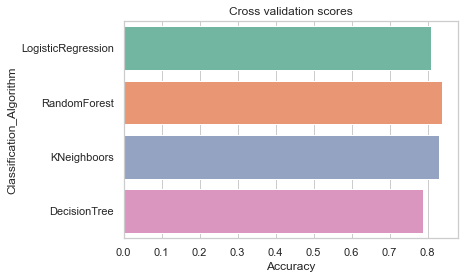

In [22]:
# Cross validate model with Kfold stratified cross validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Stratified K-Folds cross-validator
kfold = StratifiedKFold(n_splits=2) #Number of folds. Must be at least 2.
                                    #Returns the number of splitting iterations in the cross-validator.

# Modeling step Test differents algorithms 
random_state = 30

classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(DecisionTreeClassifier())

cv_results = []

for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold))

cv_means = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    
cv_res = pd.DataFrame({"CrossValMeans":cv_means, "Classification_Algorithm":["LogisticRegression", "RandomForest", "KNeighboors", "DecisionTree"]})

g = sns.barplot(cv_means, "Classification_Algorithm", data = cv_res, palette = "Set2")
g.set_xlabel("Accuracy")
g = g.set_title("Cross validation scores")

In [23]:
print('ACCURACY OF LOGISTIC REGRESSION MODEL:', round(logreg.score(X_test, y_test), 2))
print("ACCURACY OF RANDON FOREST CLASSIFIER MODEL: ", round(metrics.accuracy_score(y_test, y_pred), 2))
print("ACCURACY OF KNN MODEL:", round(kn.score(X_test, y_test), 2))
print("ACCURACY OF DECISION TREE CLASSIFIER MODEL:", round(dtc.score(X_test, y_test), 2))

ACCURACY OF LOGISTIC REGRESSION MODEL: 0.8
ACCURACY OF RANDON FOREST CLASSIFIER MODEL:  0.83
ACCURACY OF KNN MODEL: 0.89
ACCURACY OF DECISION TREE CLASSIFIER MODEL: 0.85


#### highest model accuracy is derived from KNN model.

No Skill: ROC AUC=0.50
Logistic: ROC AUC=0.74
RandonForest: ROC AUC=0.81
KNN: ROC AUC=0.96
DecisionTree: ROC AUC=0.84


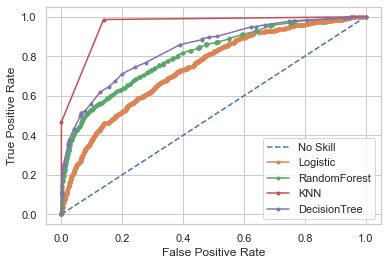

In [24]:
# ROC_AUC curve

ns_probs = [0 for _ in range(len(y_test))]

lr_probs = logreg.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
kn_probs = kn.predict_proba(X_test)
dtc_probs = dtc.predict_proba(X_test)

lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]
kn_probs = kn_probs[:, 1]
dtc_probs = dtc_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
kn_auc = roc_auc_score(y_test, kn_probs)
dtc_auc = roc_auc_score(y_test, dtc_probs)

print('No Skill: ROC AUC=%.2f' % (ns_auc))
print('Logistic: ROC AUC=%.2f' % (lr_auc))
print('RandonForest: ROC AUC=%.2f' % (rf_auc))
print('KNN: ROC AUC=%.2f' % (kn_auc))
print('DecisionTree: ROC AUC=%.2f' % (dtc_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
kn_fpr, kn_tpr, _ = roc_curve(y_test, kn_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)

pyplot.plot(ns_fpr, ns_tpr, linestyle ='--', label ='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker ='.', label ='Logistic')
pyplot.plot(rf_fpr, rf_tpr, marker ='.', label ='RandomForest')
pyplot.plot(kn_fpr, kn_tpr, marker ='.', label ='KNN')
pyplot.plot(dtc_fpr, dtc_tpr, marker ='.', label ='DecisionTree')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

#### KNN may be considered as the best classification algorithm as recommended by the above graph.

In [25]:
kn = neighbors.KNeighborsClassifier(2)
kn.fit(X_train, y_train)

# predicting KNN on test dataset
pred = kn.predict(X_test)

# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))
print("Accuracy_score of KNN on test dataset: ",round(accuracy_score(y_test, pred), 2))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2363
           1       0.74      0.33      0.45       637

    accuracy                           0.83      3000
   macro avg       0.79      0.65      0.68      3000
weighted avg       0.82      0.83      0.81      3000

Accuracy_score of KNN on test dataset:  0.83
